In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [70]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


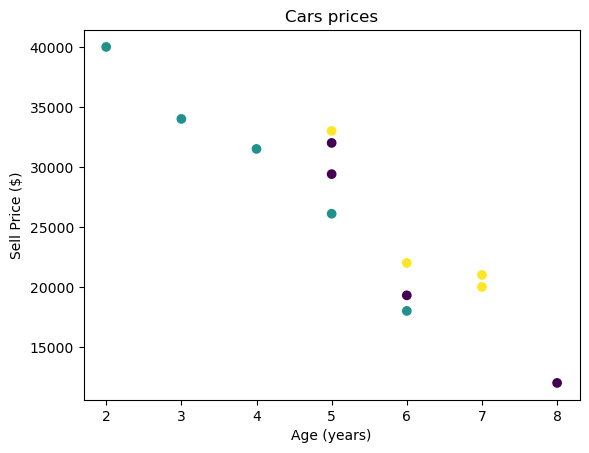

In [104]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], c=df['Car Model'])
plt.xlabel('Age (years)')
plt.ylabel('Sell Price ($)')
plt.title('Cars prices')
plt.show()


In [71]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [72]:
dummies = dummies.drop('Mercedez Benz C class', axis=1)
dummies

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [73]:
merged = pd.concat([df, dummies], axis=1)
merged


,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,BMW X5,69000,18000,6,0,1
1,BMW X5,35000,34000,3,0,1
2,BMW X5,57000,26100,5,0,1
3,BMW X5,22500,40000,2,0,1
4,BMW X5,46000,31500,4,0,1
5,Audi A5,59000,29400,5,1,0
6,Audi A5,52000,32000,5,1,0
7,Audi A5,72000,19300,6,1,0
8,Audi A5,91000,12000,8,1,0
9,Mercedez Benz C class,67000,22000,6,0,0


In [74]:
X = merged.drop(['Car Model','Sell Price($)'],axis=1)
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [77]:
y = df['Sell Price($)']
y


0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [78]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [81]:
model.predict([[45000,4,0,0]])

C:\Users\yadwa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [82]:
model.predict([[86000,7,0,1]])

C:\Users\yadwa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [83]:
model.score(X,y)

0.9417050937281083